# PROJECT SETUP STEPS:
1) We can work with Anaconda and install 'pyspark' as a conda installer. That will give us all Spark related configuration.
2) After installing pyspark we can then directly work in Jupyter notebook for our work.

# Team Members
1) Prantik Goswami(218203235)
2) Shreya Chatterjee(216100848)
3) Nada Beili(218101037)
4) Muhammad Momotazul Islam(218203293)

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('Covid-Australia-Predictor').getOrCreate()

In [3]:
sc = spark.sparkContext

# Related imports we need for our project.

In [4]:
#from pyspark.ml.clustering import KMeans #required if we are doing any unsupervised clustering related work, for eg. the CO2 emission project.
#from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
#from pyspark.ml.classification import LogisticRegression
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import unix_timestamp

# Read CSV file. You need to provide global path for reading the CSV. This provides us a pyspark dataframe to work with.

# Trying with COVID_19 project. 

In [5]:
input_data =spark.read.csv('file:///C:\\Users\\prant\\Desktop\\Junk\\SparkProject\\time_series_19-covid-Confirmed_archived_0325.csv', header=True, inferSchema=True)

# Prints all the columns and datatypes present in the pyspark dataframe generated after reading the CSV. 

In [6]:
input_data.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- 1/22/20: integer (nullable = true)
 |-- 1/23/20: integer (nullable = true)
 |-- 1/24/20: integer (nullable = true)
 |-- 1/25/20: integer (nullable = true)
 |-- 1/26/20: integer (nullable = true)
 |-- 1/27/20: integer (nullable = true)
 |-- 1/28/20: integer (nullable = true)
 |-- 1/29/20: integer (nullable = true)
 |-- 1/30/20: integer (nullable = true)
 |-- 1/31/20: integer (nullable = true)
 |-- 2/1/20: integer (nullable = true)
 |-- 2/2/20: integer (nullable = true)
 |-- 2/3/20: integer (nullable = true)
 |-- 2/4/20: integer (nullable = true)
 |-- 2/5/20: integer (nullable = true)
 |-- 2/6/20: integer (nullable = true)
 |-- 2/7/20: integer (nullable = true)
 |-- 2/8/20: integer (nullable = true)
 |-- 2/9/20: integer (nullable = true)
 |-- 2/10/20: integer (nullable = true)
 |-- 2/11/20: integer (nullable = true)
 

# Pyspark dataframes doesnot print directly. We need to use show() method to print the dataframe. 

In [7]:
input_data.show(2)

+--------------+--------------+----+-----+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|Province/State|Country/Region| Lat| Long|1/22/20|1/23/20|1/24/20|1/25/20|1/26/20|1/27/20|1/28/20|1/29/20|1/30/20|1/31/20|2/1/20|2/2/20|2/3/20|2/4/20|2/5/20|2/6/20|2/7/20|2/8/20|2/9/20|2/10/20|2/11/20|2/12/20|2/13/20|2/14/20|2/15/20|2/16/20|2/17/20|2/18/20|2/19/20|2/20/20|2/21/20|2/22/20|2/23/20|2/24/20|2/25/20|2/26/20|2/27/20|2/28/20|2/29/20|3/1/20|3/2/20|3/3/20|3/4/20|3/5/20|3/6/20|3/7/20|3/8/20|3/9/20|3/10/20|3/11/20|3/12/20|3/13/20|3/14/20|3/15/20|3/16/20|3/17/20|3/18/20

# Filtering out data only for Country = Australia.

In [8]:
input_data_filter = input_data.filter(input_data['Country/Region'] == 'Australia')

In [9]:
input_data_filter.show(2)

+---------------+--------------+--------+--------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| Province/State|Country/Region|     Lat|    Long|1/22/20|1/23/20|1/24/20|1/25/20|1/26/20|1/27/20|1/28/20|1/29/20|1/30/20|1/31/20|2/1/20|2/2/20|2/3/20|2/4/20|2/5/20|2/6/20|2/7/20|2/8/20|2/9/20|2/10/20|2/11/20|2/12/20|2/13/20|2/14/20|2/15/20|2/16/20|2/17/20|2/18/20|2/19/20|2/20/20|2/21/20|2/22/20|2/23/20|2/24/20|2/25/20|2/26/20|2/27/20|2/28/20|2/29/20|3/1/20|3/2/20|3/3/20|3/4/20|3/5/20|3/6/20|3/7/20|3/8/20|3/9/20|3/10/20|3/11/20|3/12/20|3/13/20|3/14/20|3/15/20|3/16/20

In [10]:
input_data_filter.take(1)

[Row(Province/State='New South Wales', Country/Region='Australia', Lat=-33.8688, Long=151.2093, 1/22/20=0, 1/23/20=0, 1/24/20=0, 1/25/20=0, 1/26/20=3, 1/27/20=4, 1/28/20=4, 1/29/20=4, 1/30/20=4, 1/31/20=4, 2/1/20=4, 2/2/20=4, 2/3/20=4, 2/4/20=4, 2/5/20=4, 2/6/20=4, 2/7/20=4, 2/8/20=4, 2/9/20=4, 2/10/20=4, 2/11/20=4, 2/12/20=4, 2/13/20=4, 2/14/20=4, 2/15/20=4, 2/16/20=4, 2/17/20=4, 2/18/20=4, 2/19/20=4, 2/20/20=4, 2/21/20=4, 2/22/20=4, 2/23/20=4, 2/24/20=4, 2/25/20=4, 2/26/20=4, 2/27/20=4, 2/28/20=4, 2/29/20=4, 3/1/20=6, 3/2/20=6, 3/3/20=13, 3/4/20=22, 3/5/20=22, 3/6/20=26, 3/7/20=28, 3/8/20=38, 3/9/20=48, 3/10/20=55, 3/11/20=65, 3/12/20=65, 3/13/20=92, 3/14/20=112, 3/15/20=134, 3/16/20=171, 3/17/20=210, 3/18/20=267, 3/19/20=307, 3/20/20=353, 3/21/20=436, 3/22/20=533, 3/23/20=533)]

# if there are null values present in the data then filling those with 0

In [11]:
input_data_filter=input_data_filter.fillna(0)

# Below I am trying to transpose the data so that I can get the date wise total count in each row.

In [12]:
PD_DF = input_data_filter.toPandas()

In [13]:
PD_DF

Province/State Country/Region      Lat      Long  1/22/20  \
0               New South Wales      Australia -33.8688  151.2093        0   
1                      Victoria      Australia -37.8136  144.9631        0   
2                    Queensland      Australia -28.0167  153.4000        0   
3               South Australia      Australia -34.9285  138.6007        0   
4         From Diamond Princess      Australia  35.4437  139.6380        0   
5             Western Australia      Australia -31.9505  115.8605        0   
6                      Tasmania      Australia -41.4545  145.9707        0   
7            Northern Territory      Australia -12.4634  130.8456        0   
8  Australian Capital Territory      Australia -35.4735  149.0124        0   

   1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/14/20  3/15/20  \
0        0        0        0        3        4  ...      112      134   
1        0        0        0        1        1  ...       49       57   
2        0        0        0        0        0  ...       46       61   
3        0        0        0        0        0  ...       19       20   
4        0        0        0        0        0  ...        0        0   
5        0        0        0        0        0  ...       17       17   
6        0        0        0        0        0  ...        5        6   
7        0        0        0        0        0  ...        1        1   
8        0        0        0        0        0  ...        1        1   

   3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  
0      171      210      267      307      353      436      533      533  
1       71       94      121      121      121      229      296      296  
2       68       78       94      144      184      221      221      221  
3       29       29       37       42       50       67      100      100  
4        0        0        0        0        0        0        0        0  
5       28       31       35       52       64       90      120      120  
6        7        7       10       10       10       16       22       22  
7        1        1        1        1        3        3        3        3  
8        2        2        3        4        6        9       19       19  

[9 rows x 66 columns]

In [14]:
PD_DF=PD_DF.set_index('Province/State')

In [15]:
PD_DF=PD_DF.drop(['Country/Region','Lat','Long'], axis=1)

In [16]:
PD_DF_transpose = PD_DF.transpose()

In [17]:
PD_DF_transpose

Province/State  New South Wales  Victoria  Queensland  South Australia  \
1/22/20                       0         0           0                0   
1/23/20                       0         0           0                0   
1/24/20                       0         0           0                0   
1/25/20                       0         0           0                0   
1/26/20                       3         1           0                0   
...                         ...       ...         ...              ...   
3/19/20                     307       121         144               42   
3/20/20                     353       121         184               50   
3/21/20                     436       229         221               67   
3/22/20                     533       296         221              100   
3/23/20                     533       296         221              100   

Province/State  From Diamond Princess  Western Australia  Tasmania  \
1/22/20                             0                  0         0   
1/23/20                             0                  0         0   
1/24/20                             0                  0         0   
1/25/20                             0                  0         0   
1/26/20                             0                  0         0   
...                               ...                ...       ...   
3/19/20                             0                 52        10   
3/20/20                             0                 64        10   
3/21/20                             0                 90        16   
3/22/20                             0                120        22   
3/23/20                             0                120        22   

Province/State  Northern Territory  Australian Capital Territory  
1/22/20                          0                             0  
1/23/20                          0                             0  
1/24/20                          0                             0  
1/25/20                          0                             0  
1/26/20                          0                             0  
...                            ...                           ...  
3/19/20                          1                             4  
3/20/20                          3                             6  
3/21/20                          3                             9  
3/22/20                          3                            19  
3/23/20                          3                            19  

[62 rows x 9 columns]

In [18]:
PD_DF_transpose=PD_DF_transpose.reset_index()

In [19]:
PD_DF_transpose=PD_DF_transpose.rename(columns={"index": "date"})

In [20]:
PD_DF_transpose=PD_DF_transpose.rename(columns={"New South Wales":"NSW","South Australia":"SA", "From Diamond Princess":"FDP","Western Australia":"WA","Northern Territory":"NT","Australian Capital Territory":"ACT"})

In [21]:
PD_DF_transpose

Province/State     date  NSW  Victoria  Queensland   SA  FDP   WA  Tasmania  \
0               1/22/20    0         0           0    0    0    0         0   
1               1/23/20    0         0           0    0    0    0         0   
2               1/24/20    0         0           0    0    0    0         0   
3               1/25/20    0         0           0    0    0    0         0   
4               1/26/20    3         1           0    0    0    0         0   
..                  ...  ...       ...         ...  ...  ...  ...       ...   
57              3/19/20  307       121         144   42    0   52        10   
58              3/20/20  353       121         184   50    0   64        10   
59              3/21/20  436       229         221   67    0   90        16   
60              3/22/20  533       296         221  100    0  120        22   
61              3/23/20  533       296         221  100    0  120        22   

Province/State  NT  ACT  
0                0    0  
1                0    0  
2                0    0  
3                0    0  
4                0    0  
..              ..  ...  
57               1    4  
58               3    6  
59               3    9  
60               3   19  
61               3   19  

[62 rows x 10 columns]

# Last two rows are test rows. We need to predict result of the two rows using Linear Regression.

In [22]:
PD_DF_Test = PD_DF_transpose.tail(2)

In [23]:
PD_DF_Test=PD_DF_Test.reset_index()

In [24]:
PD_DF_Test=PD_DF_Test.drop(['index'], axis=1)

In [25]:
PD_DF_Test

Province/State     date  NSW  Victoria  Queensland   SA  FDP   WA  Tasmania  \
0               3/22/20  533       296         221  100    0  120        22   
1               3/23/20  533       296         221  100    0  120        22   

Province/State  NT  ACT  
0                3   19  
1                3   19

# Preparing training data--

In [26]:
PD_DF_Train=PD_DF_transpose.drop(PD_DF_transpose.tail(2).index)

In [27]:
PD_DF_Train

Province/State     date  NSW  Victoria  Queensland  SA  FDP  WA  Tasmania  NT  \
0               1/22/20    0         0           0   0    0   0         0   0   
1               1/23/20    0         0           0   0    0   0         0   0   
2               1/24/20    0         0           0   0    0   0         0   0   
3               1/25/20    0         0           0   0    0   0         0   0   
4               1/26/20    3         1           0   0    0   0         0   0   
5               1/27/20    4         1           0   0    0   0         0   0   
6               1/28/20    4         1           0   0    0   0         0   0   
7               1/29/20    4         1           1   0    0   0         0   0   
8               1/30/20    4         2           3   0    0   0         0   0   
9               1/31/20    4         3           2   0    0   0         0   0   
10               2/1/20    4         4           3   1    0   0         0   0   
11               2/2/20    4         4           2   2    0   0         0   0   
12               2/3/20    4         4           2   2    0   0         0   0   
13               2/4/20    4         4           3   2    0   0         0   0   
14               2/5/20    4         4           3   2    0   0         0   0   
15               2/6/20    4         4           4   2    0   0         0   0   
16               2/7/20    4         4           5   2    0   0         0   0   
17               2/8/20    4         4           5   2    0   0         0   0   
18               2/9/20    4         4           5   2    0   0         0   0   
19              2/10/20    4         4           5   2    0   0         0   0   
20              2/11/20    4         4           5   2    0   0         0   0   
21              2/12/20    4         4           5   2    0   0         0   0   
22              2/13/20    4         4           5   2    0   0         0   0   
23              2/14/20    4         4           5   2    0   0         0   0   
24              2/15/20    4         4           5   2    0   0         0   0   
25              2/16/20    4         4           5   2    0   0         0   0   
26              2/17/20    4         4           5   2    0   0         0   0   
27              2/18/20    4         4           5   2    0   0         0   0   
28              2/19/20    4         4           5   2    0   0         0   0   
29              2/20/20    4         4           5   2    0   0         0   0   
30              2/21/20    4         4           5   2    4   0         0   0   
31              2/22/20    4         4           5   2    7   0         0   0   
32              2/23/20    4         4           5   2    7   0         0   0   
33              2/24/20    4         4           5   2    7   0         0   0   
34              2/25/20    4         4           5   2    7   0         0   0   
35              2/26/20    4         4           5   2    7   0         0   0   
36              2/27/20    4         4           5   2    8   0         0   0   
37              2/28/20    4         4           5   2    8   0         0   0   
38              2/29/20    4         7           9   3    0   2         0   0   
39               3/1/20    6         7           9   3    0   2         0   0   
40               3/2/20    6         9           9   3    0   2         1   0   
41               3/3/20   13         9          11   3    0   2         1   0   
42               3/4/20   22        10          11   5    0   2         1   1   
43               3/5/20   22        10          13   5    0   3         1   1   
44               3/6/20   26        10          13   7    0   3         1   0   
45               3/7/20   28        11          13   7    0   3         1   0   
46               3/8/20   38        11          15   7    0   3         2   0   
47               3/9/20   48        15          15   7    0   4         2   0   
48              3/10/20   55   

# converting back to spark dataframe to work with Linear Regression model

In [28]:
df_spark_train = spark.createDataFrame(PD_DF_Train)

In [29]:
df_spark_test = spark.createDataFrame(PD_DF_Test)

In [31]:
df_spark_train.show(10)

+-------+---+--------+----------+---+---+---+--------+---+---+
|   date|NSW|Victoria|Queensland| SA|FDP| WA|Tasmania| NT|ACT|
+-------+---+--------+----------+---+---+---+--------+---+---+
|1/22/20|  0|       0|         0|  0|  0|  0|       0|  0|  0|
|1/23/20|  0|       0|         0|  0|  0|  0|       0|  0|  0|
|1/24/20|  0|       0|         0|  0|  0|  0|       0|  0|  0|
|1/25/20|  0|       0|         0|  0|  0|  0|       0|  0|  0|
|1/26/20|  3|       1|         0|  0|  0|  0|       0|  0|  0|
|1/27/20|  4|       1|         0|  0|  0|  0|       0|  0|  0|
|1/28/20|  4|       1|         0|  0|  0|  0|       0|  0|  0|
|1/29/20|  4|       1|         1|  0|  0|  0|       0|  0|  0|
|1/30/20|  4|       2|         3|  0|  0|  0|       0|  0|  0|
|1/31/20|  4|       3|         2|  0|  0|  0|       0|  0|  0|
+-------+---+--------+----------+---+---+---+--------+---+---+
only showing top 10 rows



In [32]:
df_spark_train.printSchema()

root
 |-- date: string (nullable = true)
 |-- NSW: long (nullable = true)
 |-- Victoria: long (nullable = true)
 |-- Queensland: long (nullable = true)
 |-- SA: long (nullable = true)
 |-- FDP: long (nullable = true)
 |-- WA: long (nullable = true)
 |-- Tasmania: long (nullable = true)
 |-- NT: long (nullable = true)
 |-- ACT: long (nullable = true)



# Linear Regression doesn't work with Date type column so converting date to timestamp.

In [33]:
df_spark_train = df_spark_train.withColumn("date", unix_timestamp('date', 'MM/dd/yy'))

In [34]:
df_spark_test = df_spark_test.withColumn("date", unix_timestamp('date', 'MM/dd/yy'))

In [35]:
df_spark_train.printSchema()

root
 |-- date: long (nullable = true)
 |-- NSW: long (nullable = true)
 |-- Victoria: long (nullable = true)
 |-- Queensland: long (nullable = true)
 |-- SA: long (nullable = true)
 |-- FDP: long (nullable = true)
 |-- WA: long (nullable = true)
 |-- Tasmania: long (nullable = true)
 |-- NT: long (nullable = true)
 |-- ACT: long (nullable = true)



In [36]:
df_spark_train.show(20)

+----------+---+--------+----------+---+---+---+--------+---+---+
|      date|NSW|Victoria|Queensland| SA|FDP| WA|Tasmania| NT|ACT|
+----------+---+--------+----------+---+---+---+--------+---+---+
|1579647600|  0|       0|         0|  0|  0|  0|       0|  0|  0|
|1579734000|  0|       0|         0|  0|  0|  0|       0|  0|  0|
|1579820400|  0|       0|         0|  0|  0|  0|       0|  0|  0|
|1579906800|  0|       0|         0|  0|  0|  0|       0|  0|  0|
|1579993200|  3|       1|         0|  0|  0|  0|       0|  0|  0|
|1580079600|  4|       1|         0|  0|  0|  0|       0|  0|  0|
|1580166000|  4|       1|         0|  0|  0|  0|       0|  0|  0|
|1580252400|  4|       1|         1|  0|  0|  0|       0|  0|  0|
|1580338800|  4|       2|         3|  0|  0|  0|       0|  0|  0|
|1580425200|  4|       3|         2|  0|  0|  0|       0|  0|  0|
|1580511600|  4|       4|         3|  1|  0|  0|       0|  0|  0|
|1580598000|  4|       4|         2|  2|  0|  0|       0|  0|  0|
|158068440

# Adding all the column values to get the total number of infections per day.

In [37]:
df_spark_train = df_spark_train.withColumn('total', df_spark_train.NSW+df_spark_train.Victoria+
                                 df_spark_train.Queensland+df_spark_train.SA+df_spark_train.FDP+
                                 df_spark_train.WA+df_spark_train.Tasmania+df_spark_train.NT+df_spark_train.ACT)

In [38]:
df_spark_test = df_spark_test.withColumn('total', df_spark_test.NSW+df_spark_test.Victoria+
                                 df_spark_test.Queensland+df_spark_test.SA+df_spark_test.FDP+
                                 df_spark_test.WA+df_spark_test.Tasmania+df_spark_test.NT+df_spark_test.ACT)

In [39]:
df_spark_train.show(20)

+----------+---+--------+----------+---+---+---+--------+---+---+-----+
|      date|NSW|Victoria|Queensland| SA|FDP| WA|Tasmania| NT|ACT|total|
+----------+---+--------+----------+---+---+---+--------+---+---+-----+
|1579647600|  0|       0|         0|  0|  0|  0|       0|  0|  0|    0|
|1579734000|  0|       0|         0|  0|  0|  0|       0|  0|  0|    0|
|1579820400|  0|       0|         0|  0|  0|  0|       0|  0|  0|    0|
|1579906800|  0|       0|         0|  0|  0|  0|       0|  0|  0|    0|
|1579993200|  3|       1|         0|  0|  0|  0|       0|  0|  0|    4|
|1580079600|  4|       1|         0|  0|  0|  0|       0|  0|  0|    5|
|1580166000|  4|       1|         0|  0|  0|  0|       0|  0|  0|    5|
|1580252400|  4|       1|         1|  0|  0|  0|       0|  0|  0|    6|
|1580338800|  4|       2|         3|  0|  0|  0|       0|  0|  0|    9|
|1580425200|  4|       3|         2|  0|  0|  0|       0|  0|  0|    9|
|1580511600|  4|       4|         3|  1|  0|  0|       0|  0|  0

# Selecting only the Date column as independent variable and total column as dependent variable.

In [40]:
df_spark_train = df_spark_train.select(df_spark_train.date, df_spark_train.total)

In [41]:
df_spark_test = df_spark_test.select(df_spark_test.date, df_spark_test.total)

In [42]:
df_spark_train.show()

+----------+-----+
|      date|total|
+----------+-----+
|1579647600|    0|
|1579734000|    0|
|1579820400|    0|
|1579906800|    0|
|1579993200|    4|
|1580079600|    5|
|1580166000|    5|
|1580252400|    6|
|1580338800|    9|
|1580425200|    9|
|1580511600|   12|
|1580598000|   12|
|1580684400|   12|
|1580770800|   13|
|1580857200|   13|
|1580943600|   14|
|1581030000|   15|
|1581116400|   15|
|1581202800|   15|
|1581289200|   15|
+----------+-----+
only showing top 20 rows



In [43]:
df_spark_test.show()

+----------+-----+
|      date|total|
+----------+-----+
|1584831600| 1314|
|1584918000| 1314|
+----------+-----+



# Plotting the train data to see the nature of the data.

In [44]:
panda_df=df_spark_train.toPandas()

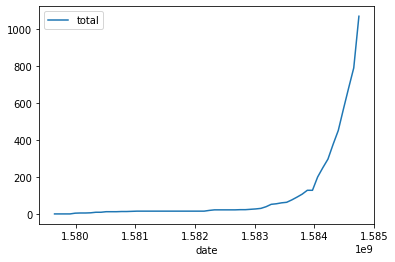

In [45]:
panda_df.plot(x='date', y='total')

# Feature creation steps......

In [46]:
vector_assembler = VectorAssembler(inputCols=['date'], outputCol='feature')

In [47]:
train_data_va_df=vector_assembler.transform(df_spark_train)

In [48]:
test_data_va_df=vector_assembler.transform(df_spark_test)

In [49]:
train_data_va_df.show(2)

+----------+-----+-------------+
|      date|total|      feature|
+----------+-----+-------------+
|1579647600|    0|[1.5796476E9]|
|1579734000|    0| [1.579734E9]|
+----------+-----+-------------+
only showing top 2 rows



In [50]:
train_df = train_data_va_df.select(['feature', 'total'])

In [51]:
test_df = test_data_va_df.select(['feature', 'total'])

In [52]:
train_df.show(2), test_df.show(2)

+-------------+-----+
|      feature|total|
+-------------+-----+
|[1.5796476E9]|    0|
| [1.579734E9]|    0|
+-------------+-----+
only showing top 2 rows

+-------------+-----+
|      feature|total|
+-------------+-----+
|[1.5848316E9]| 1314|
| [1.584918E9]| 1314|
+-------------+-----+



(None, None)

# Linear Regression Model Creation----

In [53]:
linear_reggression_model = LinearRegression(featuresCol='feature', 
                                            labelCol='total', 
                                            maxIter=10,
                                            regParam=0.3, elasticNetParam=0.8)

# Fitting train data---

In [54]:
linear_reggression_model = linear_reggression_model.fit(train_df)

# Testing prediction on test data---

In [55]:
prediction_df=linear_reggression_model.transform(test_df)

In [56]:
prediction_df.show()

+-------------+-----+------------------+
|      feature|total|        prediction|
+-------------+-----+------------------+
|[1.5848316E9]| 1314|333.01399891861365|
| [1.584918E9]| 1314|340.61719013997936|
+-------------+-----+------------------+



 # Print the coefficients and intercept for linear regression

In [57]:
print("Coefficients: %s" % str(linear_reggression_model.coefficients))
print("Intercept: %s" % str(linear_reggression_model.intercept))

Coefficients: [8.799989839554475e-05]
Intercept: -139132.00577513


In [58]:
model_summary = linear_reggression_model.summary

# Summarize the model over the training set and print out some metrics

In [59]:
print("numIterations: %d" % model_summary.totalIterations)
print("objectiveHistory: %s" % str(model_summary.objectiveHistory))

numIterations: 3
objectiveHistory: [0.5, 0.43874588869148423, 0.29726653905277634]


In [60]:
print("RMSE==", model_summary.rootMeanSquaredError)

RMSE== 159.25242829525206


In [61]:
print("r2==", model_summary.r2)

r2== 0.4070621794575946


In [62]:
spark.stop()

# Discussion

from the training data plot it can be seen that the infection rate increased exponentially after a certain date, due to that Linear Regression model will not be a good model to predict future data. We can see from the training summery that the RootMeanSquaredError is high and also the R^2 value is near to 0. We know that if R^2 value is near to 1 then the model is good. So from this experiment it can be summarized that Linear Regression model is not a good model for the given time series data. 